<a href="https://colab.research.google.com/github/JulTob/Optimization/blob/main/Introduction_to_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Optimization

# An adventurer’s guide

Optimization is the art of choosing *the best* among infinitely many possibilities.

Sometimes we want the cheapest option.  
Sometimes the fastest.  
Sometimes the safest, the strongest, or the most elegant.

In this notebook, we will treat it as a journey.


## Our Journey begins

Every optimization problem answers the same question:

> “Where should we go to find our treasure?”

To ask it meaningfully, we always need three things:

- a function that shapes our **landscape**,
- a **space** we can traverse, called the domain,
- and a **goal**: to minimize as low as possible, or maximize as high as possible.



## Unconstrained

In *unconstrained* optimization, the domain is as large as it can be:
every real value is allowed.

There are:
- no bounds,
- no forbidden regions,
- no extra conditions.

The only thing guiding us is the **shape of the function itself**.

In this first expedition, the terrain is open.
Nothing is forbidden.
Every real value is allowed.

This is what *unconstrained* optimization means.


## Functions are landscapes

Instead of thinking of a function as a formula, we should think of it as a landscape.

- horizontal directions represent **choices**,
- vertical height represents **value**.

Depending on the mission, we look for Valleys or Peaks: Places were our function takes a low or hich value. Those are good positions to find the best, but also the worst. Low points are valleys. High points are peaks.


Optimization is way more than just algebra: it is **navigation**.
Before solving anything, we must be  explorer.


## The expedition crew

We are not alone on this journey.

If the **computer** is our ship, then **Python** is the crew.
It follows instructions, performs measurements, and keeps the expedition running.

**SciPy** is our lookout in the crow’s nest. It can tell you exactly where you are, day or night, and help you point the way.

In [422]:
from scipy.optimize import minimize_scalar


But first we need to mark the destination. We define our goal with our **objective**, a function that evaluates how good or bad our position is:

In [423]:
def objective(x):
    return 2*x**2 + x - 1

In code, this means:

- `objective(x)` tells us the height of the landscape at position `x`,
- lower values mean “better” positions when we are minimizing.



## Visualization comes first

Before parting ways, a good sailor finds a map to guide him. The first step to every journey. Not every map marks treasure (life is not that easy), but it can save you endless searching to know the lands and seas you will meet. Where to be careful, where to run, where not to go at all. A plot can give you the same information.

Luckily, python comes with a great set of navigators that can plot for you beautiful maps.
- `matplotlib.pyplot` is the artistic guy that makes beautiful artistry, with a precise hand and eye for details.
- `numpy`is the guy that measures twice, that knows sextants and astrolabius, capable of reading the compass to the atom. He colaborates with the map maker to give him exact measures. We need to use exact proportions!

In [424]:
import matplotlib.pyplot as plt
import numpy as np

def plot(objective, x_min = -3, x_max = 3):
    # Generate x values for the plot
    x_values = np.linspace(x_min, x_max, 400)
    y_values = objective(x_values)

    # Plot the function
    plt.plot(x_values, y_values)
    plt.title("Plot of objective function")
    plt.xlabel("x")
    plt.ylabel("objective(x)")
    plt.grid(True)
    plt.show()

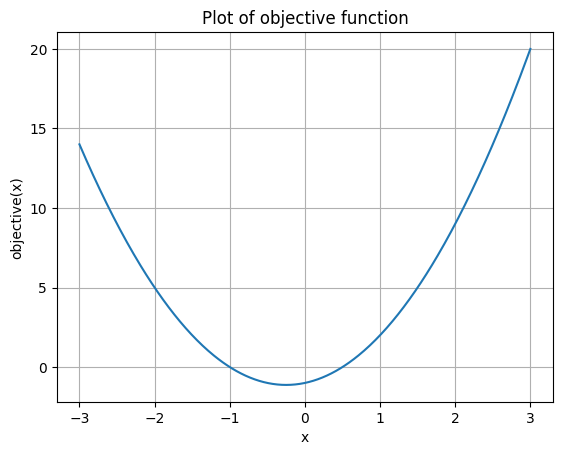

In [425]:
plot(objective)

Once the destination is clear, SciPy explores on our behalf.

## Delegating the search

The lookout does not see the full map.
It does not understand the function symbolically.

It simply takes steps and keeps asking one question:

> “If I move here… is it lower?”

When it is satisfied, it reports back.


In [426]:
result = minimize_scalar(objective)
print(result)

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -1.125
       x: -0.2499999925800001
     nit: 24
    nfev: 27


What SciPy returns iit brings an **expedition log**:

- where it ended (`x`),
- how low it went (`fun`),
- and whether it trusts the result (`success`).


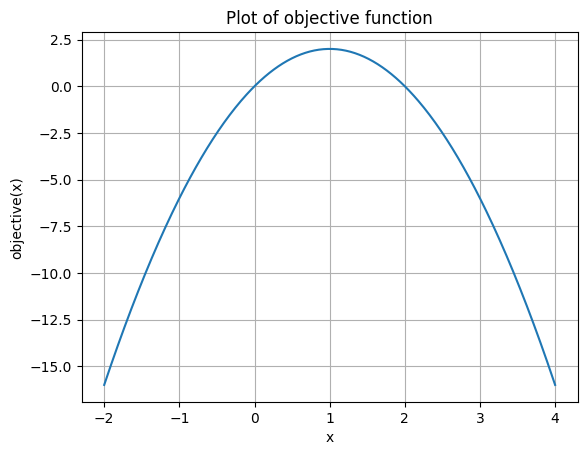

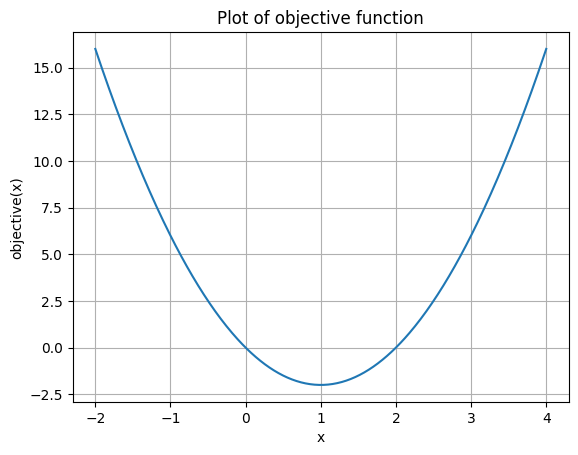

Result:
        at x = 1.0
        valued 2.0  


In [427]:
from scipy.optimize import minimize_scalar

# To MAXIMIZE

def objective(x):
    return 4*x - 2*x**2

plot(objective,-2,4)


def negated_objective(x):
    return -objective(x)

plot(negated_objective,-2,4)

maxima = minimize_scalar(negated_objective)
if maxima.success:
    print(f"""Result:
        at x = {maxima.x}
        valued {-maxima.fun}  """)



## A sea of posibilities.

So far, our examples show just one horizontal line, and the value is determined by how much value there is avobe or below the line.

In higher dimensions, the idea does not change, only the way we represent values. In a surface we need to go up and down, and in more dimensions we can visulize a score that shows the value of our objective function.

But there is one big change: the explorer now chooses in many *directions*, not just forward and backward..


In [437]:
from scipy.optimize import minimize

def objective(x):
    return (x[0]-2)**2 + (x[1]-3)**2 + 2

x0 = [1,1] #-- First guess

result = minimize(objective, x0)
print(f"{result.x}")
print(f"We must head North by {result.x[0]:.1f} units, and East by {result.x[1]:.1f}")

[2.00000001 3.00000002]
We must head North by 2.0 units, and East by 3.0


## Contour maps as topographic charts

In two dimensions, we cannot see the altitute of the surface at once.

Instead, we can draw contour lines:
paths of equal height,
these elevation curves are like cutting horizontally at the same value on a geographical map.

Following these lines shows us how the terrain slopes
and where the valleys lie.


In [457]:
def plot_2D(objective, x_rank=(-5,5), y_rank=(-5,5),
            levels=40, lines= 12, line_mode="power", power=2,
            constraints=None):
    x = np.linspace(x_rank[0], x_rank[1], 200)
    y = np.linspace(y_rank[0], y_rank[1], 200)
    X, Y = np.meshgrid(x, y)

    Z = np.array([objective([xi, yi]) for xi, yi in zip(X.ravel(), Y.ravel())]).reshape(X.shape)
    feasible_mask = np.ones_like(Z, dtype=bool)

    if constraints is not None:
        for constraint in constraints:
            C = np.array([
                constraint([xi, yi])
                for xi, yi in zip(X.ravel(), Y.ravel())
            ]).reshape(X.shape)

            feasible_mask &= (C >= 0)

    z_min = float(Z.min())
    z_max = float(Z.max())

    filled_levels_count = levels
    line_levels_count = lines

    if line_mode == "power":
        t = np.linspace(0, 1, line_levels_count)
        line_levels = z_min + (t**power) * (z_max - z_min)

    elif line_mode == "log":
        delta = z_max - z_min
        eps = delta * 1e-3
        line_levels = z_min + np.geomspace(eps, delta, line_levels_count)

    elif line_mode == "quantile":
        line_levels = np.quantile(Z, np.linspace(0, 1, line_levels_count))

    else:
        line_levels = np.linspace(z_min, z_max, line_levels_count)  # fallback

    plt.figure(figsize=(8, 6))

    Z_masked = np.ma.masked_where(~feasible_mask, Z)

    filled = plt.contourf(
        X, Y, Z_masked,
        levels=filled_levels_count,
        cmap="terrain",
        alpha=0.85
    )

    lines = plt.contour(
        X, Y, Z,
        levels=line_levels,
        cmap="seismic",
        linewidths=0.75,
        alpha=0.99
    )

    if constraints is not None:
        for constraint in constraints:
            C = np.array([
                constraint([xi, yi])
                for xi, yi in zip(X.ravel(), Y.ravel())
                ]).reshape(X.shape)

            plt.contour(
                X, Y, C,
                levels=[0],
                colors="black",
                linewidths=2,
                linestyles="--"
            )

    plt.clabel(lines, inline=True, fontsize=8)

    plt.colorbar(filled, label="objective(x, y)")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Objective (topographic view)")
    plt.grid(True, alpha=0.3)
    plt.show()


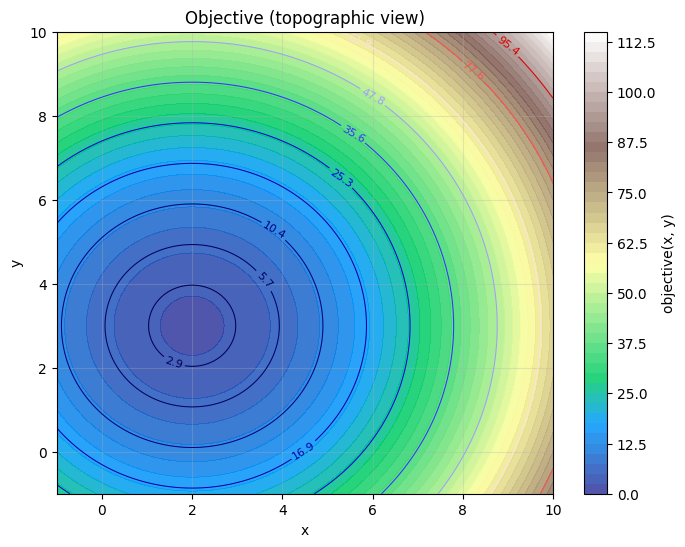

In [442]:
plot_2D(objective, (-1,10), (-1,10), 50, 12)


Contour lines mark positions of equal value.
Crossing one line means gaining or losing altitude.

An Optimizer descends by crossing these lines,
always seeking lower ground.


# Boundaries

Up to now, our explorer could wander freely: no walls, no cliffs, no “keep out” signs.

Constraints change that.
They add walls, cliffs, and forbidden regions.

In a bound-constrained problem, each variable lives inside a permitted range:

* too little → your plan isn’t even accepted
* too much → you can’t pay for it
* anywhere in between → fair game for the expedition



# The mission: the Coffee Archipelago 🧭☕

Your ship sails between two coffee-rich islands. As a merchant and you know coffee is easy to sell up north. And you spend long hours sailing, so you could use some high quality coffee yourself!

Two islands sell beans nearby:
* Island of Arenosa:
  - Grows bean you will log as `b[0]`
* Island of Barbuda:
  - these beans you'll log as `b[1]`

Each island demands tribute, effort, and risk. You estimate the costs of the total burden of your expedition, encoded in the objective function.

Unfortunately:

You cannot dock for less than 2 metric units of supplies (the port authority will reject you).

You cannot carry more than 100 units (the supplier would run out!).

Your job is to **choose quantities** that keep total cost as low as possible.




[6. 8.]


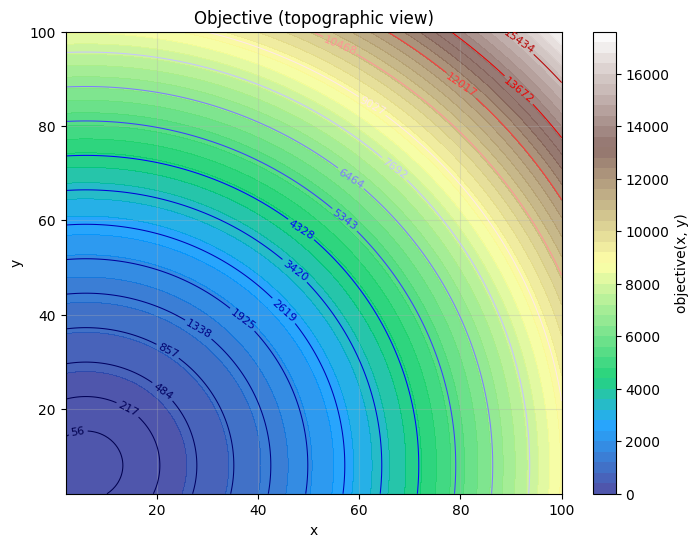

In [449]:
def objective(b):
  return (b[0] - 6)**2 + (b[1] - 8)**2 + 3

# Set the bounds of your problem
bounds = [[2,100],[2,100]]

x0 = [10, 10]

# Find the minimum
result = minimize(objective, x0, bounds=bounds)

print(result.x)

plot_2D(objective, (2,100), (2,100), 50, 19)

---

### What SciPy does for us

We’ll hand this map to our lookout (`scipy.optimize.minimize`) and give it one rule:

> “Search for the lowest valley… **but never leave the allowed sea lanes**.”

`Bounds` are those sea lanes: the legal rectangle on the map you’re allowed to explore.



# Constrains

As a merchant and adventurer, you know there are rules that separate civilization and the lawless. Some of these are treaties, contracts, or even promises. You want to be rich, sure, but there are some principles you abide by, even when nobody is looking.

These rules are called **constraints**.

Some of these "possible, but forviden" actions can be accounted for, and they should!

### From borders to rules

There are two kinds of limits we encounter:

* **Bounds** are borders on the map.
  They say: *“You cannot go beyond this point.”*

* **Constraints** are rules enforced everywhere.
  They say: *“Wherever you are, this must remain true.”*

A constraint might involve:

* the **sum** of your choices,
* their **balance**,
* or a **resource limit** that cannot be exceeded.

Crossing a boundary is _impossible_.
Breaking a constraint is _bad_.

---

# What an optimizer does with constraints

When constraints are present, the optimizer’s mission changes:

> “Find the lowest valley
> **that also respects every condition**.”

The search is no longer about *absolute* best,
but about the best **feasible** solution. The treasure only counts if you’re allowed to keep it.




[5. 7.]


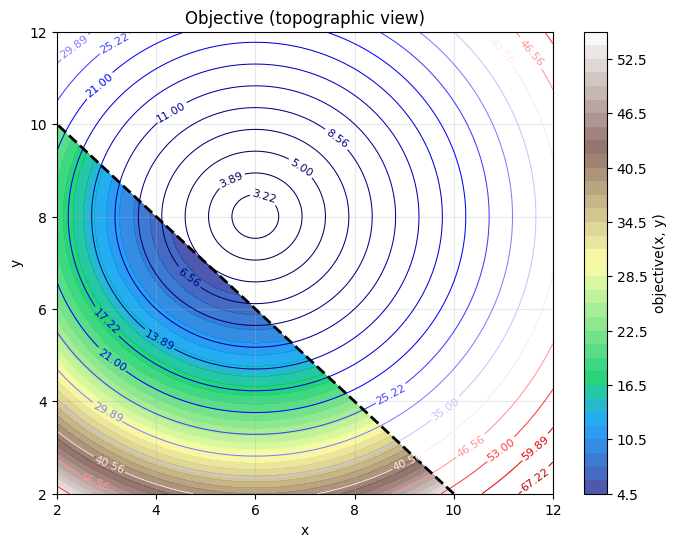

In [460]:
from scipy.optimize import minimize

def objective(b):
    return (b[0] - 6)**2 + (b[1] - 8)**2 + 3


# --- New constraint ---
# Pirates have been seen around!
# We must keep the ship light!
# Total cargo must not exceed 12 units
def cargo_limit(b):
    max_cargo = 12
    return max_cargo - (b[0] + b[1]) # >= 0


bounds = [(2, 100), (2, 100)]
x0 = [5, 5]

constraints = [
    {"type": "ineq", "fun": cargo_limit}
]

result = minimize(
    objective,
    x0,
    bounds=bounds,
    constraints=constraints,
)

print(result.x)

plot_2D(
    objective,
    x_rank=(2, 12),
    y_rank=(2, 12),
    constraints=[cargo_limit],
    lines = 19
)
